# Univariate forecasting with help of LSTM

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import pandas_datareader.data as web
from datetime import datetime

In [38]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,6

In [2]:
start = datetime(2010,1,1)
end = datetime(2020,1,1)
reliance = web.DataReader('RELIANCE.NS','yahoo',start,end)

In [3]:
reliance.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,540.427307,506.127411,540.427307,532.700500,35372156.0,485.824005
2010-01-05,569.551208,527.697937,569.551208,530.323059,9872785.0,483.655701
2010-01-06,542.111328,530.298279,534.879883,538.891846,10933743.0,491.470398


In [4]:
rdf = reliance['Adj Close']

In [ ]:
rdf.isna().sum()

In [14]:
train = rdf.iloc[:1969]

In [15]:
test = rdf.iloc[1969:]

In [16]:
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_x = i + n_features
		# check if we are beyond the sequence
		if end_x > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_x], timeseries_data[end_x]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [21]:
timeseries_data = list(train)

# choose a number of time steps
n_steps = 20
# split into samples
X_train, y_train = prepare_data(timeseries_data, n_steps)


In [22]:
X_train

array([[485.82400513, 483.65570068, 491.47039795, ..., 468.50048828,
        472.58859253, 472.22717285],
       [483.65570068, 491.47039795, 499.62390137, ..., 472.58859253,
        472.22717285, 464.05111694],
       [491.47039795, 499.62390137, 498.31390381, ..., 472.22717285,
        464.05111694, 467.05502319],
       ...,
       [907.90356445, 923.75463867, 927.75402832, ..., 897.17352295,
        898.3928833 , 903.22137451],
       [923.75463867, 927.75402832, 927.99786377, ..., 898.3928833 ,
        903.22137451, 895.612854  ],
       [927.75402832, 927.99786377, 920.19421387, ..., 903.22137451,
        895.612854  , 890.54046631]])

In [23]:
y_train

array([464.05111694, 467.05502319, 460.36953735, ..., 895.612854  ,
       890.54046631, 897.80761719])

In [24]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [25]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
61/61 [==============================] - 3s 11ms/step - loss: 218402.5655
Epoch 2/300
61/61 [==============================] - 1s 11ms/step - loss: 2847.2906
Epoch 3/300
61/61 [==============================] - 1s 11ms/step - loss: 763.5843
Epoch 4/300
61/61 [==============================] - 1s 11ms/step - loss: 767.1193
Epoch 5/300
61/61 [==============================] - 1s 11ms/step - loss: 686.8486
Epoch 6/300
61/61 [==============================] - 1s 11ms/step - loss: 694.2187
Epoch 7/300
61/61 [==============================] - 1s 11ms/step - loss: 646.6841
Epoch 8/300
61/61 [==============================] - 1s 11ms/step - loss: 607.9703
Epoch 9/300
61/61 [==============================] - 1s 11ms/step - loss: 566.5832
Epoch 10/300
61/61 [==============================] - 1s 12ms/step - loss: 534.4028
Epoch 11/300
61/61 [==============================] - 1s 12ms/step - loss: 500.7372
Epoch 12/300
61/61 [==============================] - 1s 12ms/step - loss: 460.28

61/61 [==============================] - 1s 11ms/step - loss: 131.2231
Epoch 99/300
61/61 [==============================] - 1s 11ms/step - loss: 135.6088
Epoch 100/300
61/61 [==============================] - 1s 11ms/step - loss: 146.6039
Epoch 101/300
61/61 [==============================] - 1s 11ms/step - loss: 140.9448
Epoch 102/300
61/61 [==============================] - 1s 11ms/step - loss: 135.0452
Epoch 103/300
61/61 [==============================] - 1s 11ms/step - loss: 130.2986
Epoch 104/300
61/61 [==============================] - 1s 11ms/step - loss: 168.4687
Epoch 105/300
61/61 [==============================] - 1s 11ms/step - loss: 132.7903
Epoch 106/300
61/61 [==============================] - 1s 11ms/step - loss: 142.2949
Epoch 107/300
61/61 [==============================] - 1s 11ms/step - loss: 144.3616
Epoch 108/300
61/61 [==============================] - 1s 11ms/step - loss: 131.2848
Epoch 109/300
61/61 [==============================] - 1s 11ms/step - loss: 132.

61/61 [==============================] - 1s 11ms/step - loss: 98.3993
Epoch 195/300
61/61 [==============================] - 1s 11ms/step - loss: 170.2275
Epoch 196/300
61/61 [==============================] - 1s 11ms/step - loss: 153.4335
Epoch 197/300
61/61 [==============================] - 1s 11ms/step - loss: 2444.0479
Epoch 198/300
61/61 [==============================] - 1s 11ms/step - loss: 2935.7841
Epoch 199/300
61/61 [==============================] - 1s 11ms/step - loss: 532.5946
Epoch 200/300
61/61 [==============================] - 1s 11ms/step - loss: 440.1007
Epoch 201/300
61/61 [==============================] - 1s 11ms/step - loss: 430.8433
Epoch 202/300
61/61 [==============================] - 1s 11ms/step - loss: 617.8312
Epoch 203/300
61/61 [==============================] - 1s 11ms/step - loss: 1532.3744
Epoch 204/300
61/61 [==============================] - 1s 11ms/step - loss: 982.3436
Epoch 205/300
61/61 [==============================] - 1s 11ms/step - loss: 9

61/61 [==============================] - 1s 19ms/step - loss: 466.1313
Epoch 291/300
61/61 [==============================] - 1s 14ms/step - loss: 413.3697
Epoch 292/300
61/61 [==============================] - 1s 12ms/step - loss: 402.8196
Epoch 293/300
61/61 [==============================] - 1s 12ms/step - loss: 350.5148
Epoch 294/300
61/61 [==============================] - 1s 12ms/step - loss: 437.3637
Epoch 295/300
61/61 [==============================] - 1s 12ms/step - loss: 346.3837
Epoch 296/300
61/61 [==============================] - 1s 12ms/step - loss: 391.2089
Epoch 297/300
61/61 [==============================] - 1s 12ms/step - loss: 388.5842
Epoch 298/300
61/61 [==============================] - 1s 12ms/step - loss: 366.3759
Epoch 299/300
61/61 [==============================] - 1s 12ms/step - loss: 330.7491
Epoch 300/300
61/61 [==============================] - 1s 12ms/step - loss: 308.9111


In [26]:
timeseries_data = list(test)
X_test, y_test = prepare_data(timeseries_data, n_steps)

In [35]:
xinput = X[-1].reshape((1,n_steps,n_features))
predicted = []
for i in range(len(X_test)):
    xinput = X_test[i].reshape((1,n_steps,n_features))
    predicted.append(model.predict(xinput)[0][0])

In [44]:
resdf = pd.DataFrame({"actual":y_test, "pred":predicted})

<AxesSubplot:>

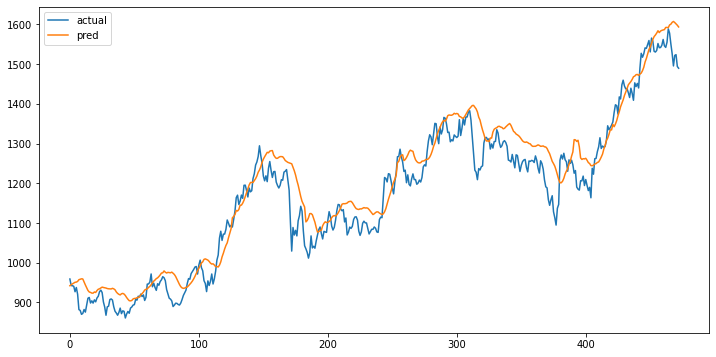

In [46]:
resdf.plot()

### The model follows closely and may be used as a tool to fool people, but if you look closely, its actually a shit. 